In [73]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [74]:
#reading the file that contains regional map of Ghana
regions = gpd.read_file("/Users/sdevkota01/Downloads/Python/GEO/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")

In [75]:
# looking the datasets 
regions

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."
5,Northern,"POLYGON ((818287.468 1185632.455, 818268.664 1..."
6,Upper East,"POLYGON ((811994.328 1230449.528, 812004.699 1..."
7,Upper West,"POLYGON ((658854.315 1220818.656, 659057.210 1..."
8,Volta,"POLYGON ((899718.788 875120.098, 899564.444 87..."
9,Western,"POLYGON ((490349.315 771271.143, 490530.091 77..."


In [76]:
#checking the type of the dataset
type(regions)

geopandas.geodataframe.GeoDataFrame

In [77]:
#GeoDataFrame uses EPSG 32630
print(regions.crs)
#when creating a GeoDataFrame from CSV file, we have to set the CRS EPSG 4326
#Corresponds to coordinates in latitude and longitude

epsg:32630


In [78]:
# Creating a GeoDataFrame with health facilities in Ghana 
health = pd.read_csv("/Users/sdevkota01/Downloads/Python/GEO/ghana/ghana/health_facilities.csv")
#The gpd.points_from_xy() function creates Point objects from the latitude and longitude columns
health = gpd.GeoDataFrame(health,geometry=gpd.points_from_xy(health.Longitude,health.Latitude))


In [79]:
#checking Coordinate reference system (CRS)
print(health.crs)

None


In [80]:
# setting coordinate reference system (CRS) to EPSG:4326
#when creating a GeoDataFrame from CSV file, we have to set the CRS EPSG 4326
#Corresponds to coordinates in latitude and longitude
health.crs = {'init':'epsg:4326'}

/Users/sdevkota01/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [81]:
# checking CRS
print(health.crs)

+init=epsg:4326 +type=crs


In [82]:
#glance at first five rows of data sets
health.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In [83]:
#Re-projecting refers to the process of changing the CRS. 
#This is done in GeoPandas with the to_crs() method.
#When plotting multiple GeoDataFrames, 
#it's important that they all use the same CRS.
#health = health.set_crs('epsg:32630')

<AxesSubplot:>

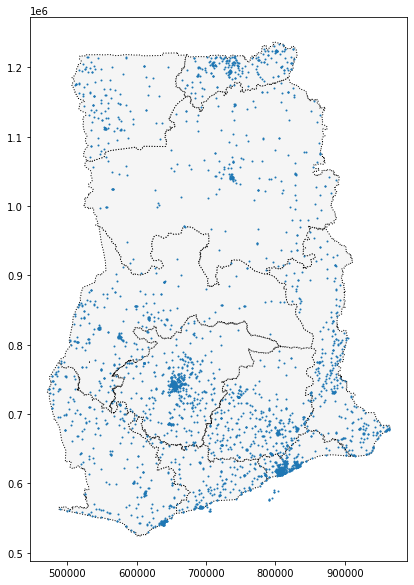

In [84]:
#creating a map
ax = regions.plot(figsize=(10,10), color = 'whitesmoke',linestyle = ':',edgecolor = 'black')
# chnaging CRS from 4326 to 32630 and plotting
health.to_crs(epsg=32630).plot(markersize=1, ax=ax)



In [85]:
health.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [86]:
#In case the EPSG code is not available in GeoPandas,
#we can change the CRS with what's known as the "proj4 string" of the CRS.
#For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:
# "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
# Changing the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [87]:
# to get x and y coordinate use .x and .y attributes
# Getting the x-coordinate of each point
health.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [88]:
# Getting the y-coordinate of each point
health.geometry.head().y

0    7.40801
1    6.46312
2    6.22393
3    6.84177
4    6.84177
dtype: float64

In [89]:
# to calculate area (in square meters) of each polygon in the GeoDataFrame
regions.loc[:,'Area']= regions.geometry.area / 10**6

print("Area of Ghana: {} Square kilometers".format(regions.Area.sum()))
print("CRS:",regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 Square kilometers
CRS: epsg:32630


,Region,geometry,Area
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
